In [185]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings(action = 'ignore') #or 'once'

In [3]:
survey = pd.read_csv('../data/survey/survey.csv')
survey.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
countries = survey.cntry.unique()
years = survey.year.unique()

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

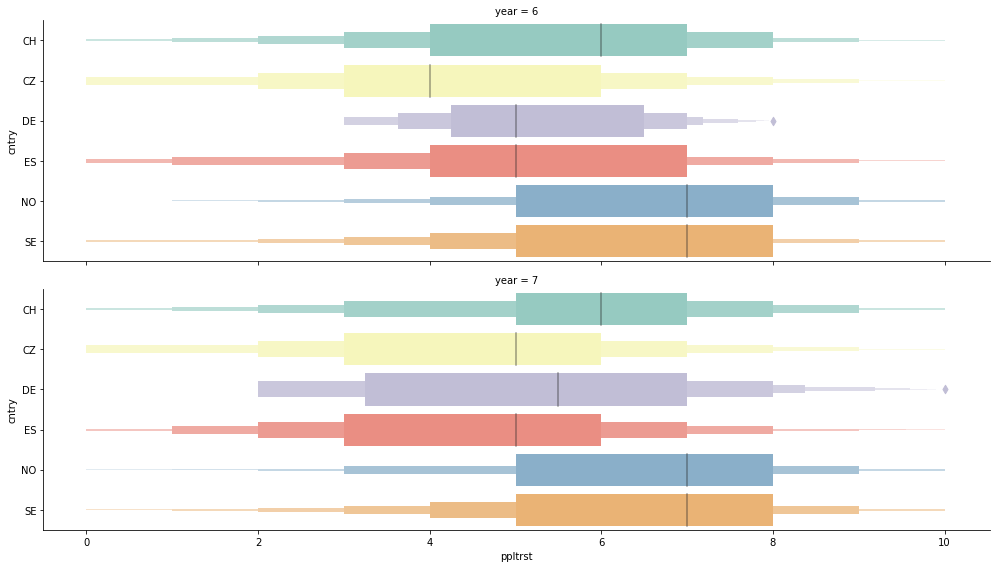

In [6]:
g = sns.catplot(x="ppltrst", y='cntry', row="year",
                data=survey,
                orient="h", palette="Set3",
                kind="boxen", height=4,aspect=3.5,dodge=True)

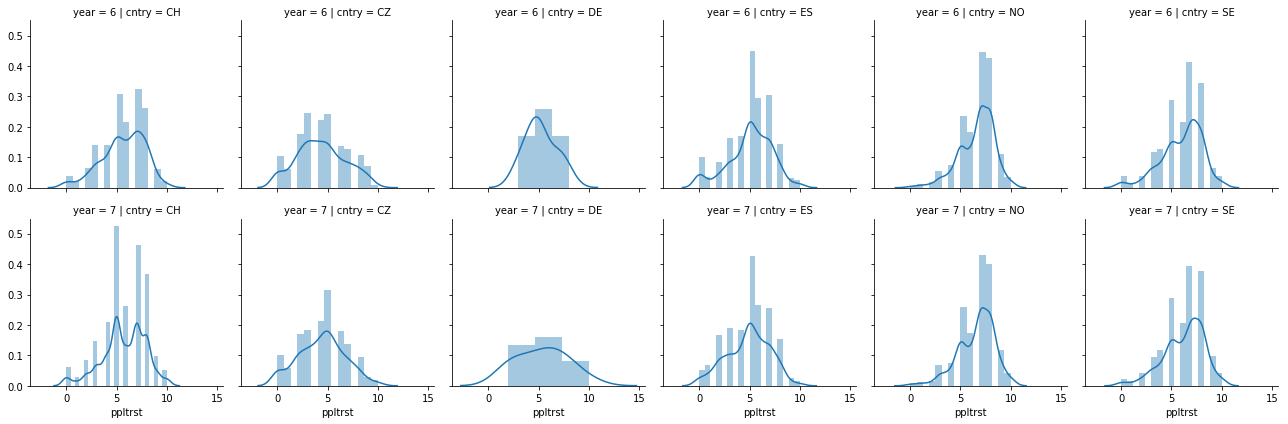

In [121]:
g = sns.FacetGrid(survey, row="year", col="cntry")
g.map(sns.distplot, "ppltrst");

Did people become less trusting from 2012 to 2014? 
Compute results for each country in the sample.

In [130]:
# trust = survey[['ppltrst','cntry','year','idno']].groupby(['cntry','year','idno']).mean()
trust = survey[['ppltrst','cntry','year','idno']]

In [192]:
trust_2012,trust_2014 = [], []

for i in countries:
    trust_2012.append(trust['ppltrst'][(trust['cntry']==i) & (trust['year'] == 6)].tolist())
    trust_2014.append(trust['ppltrst'][(trust['cntry']==i) & (trust['year'] == 7)].tolist())
    
ranking_2012,ranking_2014,ranges = [],[],[]
countries_2012,countries_2014 = [],[]
for i in range(len(trust_2012)):
    ranking_2012 +=trust_2012[i]
    for j in range(len(trust_2012[i])):
        countries_2012.append(countries[i])
    if i == 0:
        tup = (0,len(trust_2012[i]))
        ranges.append(tup)
    else:
        tup = (ranges[i-1][1],ranges[i-1][1]+len(trust_2012[i]))
        ranges.append(tup)
    print(ranges[i],end="|");print(len(trust_2012[i]),end="|");print(countries[i])

(0, 773)|773|CH
(773, 1431)|658|CZ
(1431, 1445)|14|DE
(1445, 2658)|1213|ES
(2658, 3389)|731|NO
(3389, 4297)|908|SE


In [138]:
import scipy.stats as stats
import numpy as np
ranks = stats.rankdata(ranking_2012,method='dense')

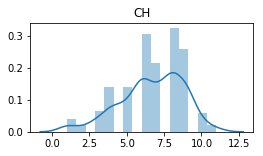

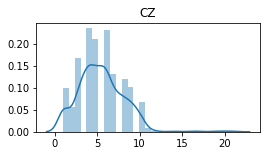

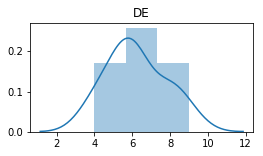

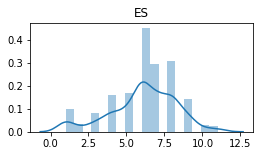

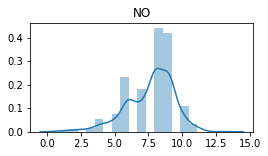

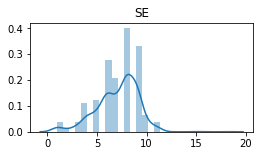

In [139]:
for i,v in enumerate(ranges):
    plt.figure(figsize=(4,2))
    sns.distplot(ranks[v[0]:v[1]])
    plt.title(countries[i])
    plt.show()

In [184]:
# Kruskal-Wallace Test

# Join all ratings together into a list, then ranking them.
ranks = stats.rankdata(ranking_2012)

stats.kruskal(trust_2012[0],trust_2012[2],trust_2012[3])

KruskalResult(statistic=33.98648481651015, pvalue=4.168008466242861e-08)

In [191]:
tukey = pairwise_tukeyhsd(endog=ranking_2012,      # Data
                          groups=countries_2012,   # Groups
                          alpha=0.05)         # Significance level

tukey.summary() 

group1,group2,meandiff,lower,upper,reject
CH,CZ,nan,nan,nan,False
CH,DE,-0.4636,nan,nan,False
CH,ES,-0.5633,nan,nan,False
CH,NO,nan,nan,nan,False
CH,SE,nan,nan,nan,False
CZ,DE,nan,nan,nan,False
CZ,ES,nan,nan,nan,False
CZ,NO,nan,nan,nan,False
CZ,SE,nan,nan,nan,False
DE,ES,-0.0997,nan,nan,False
